In [54]:
#get the dataset from Dropbox
!wget https://www.dropbox.com/s/3p6x3bypteo5q2x/BrainTumorDataset.zip?dl=0

--2023-01-31 08:40:04--  https://www.dropbox.com/s/3p6x3bypteo5q2x/BrainTumorDataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6027:18::a27d:4812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3p6x3bypteo5q2x/BrainTumorDataset.zip [following]
--2023-01-31 08:40:05--  https://www.dropbox.com/s/raw/3p6x3bypteo5q2x/BrainTumorDataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc44e0a4cb35d3572af2e9ff4129.dl.dropboxusercontent.com/cd/0/inline/B1mg7UiFX6-Omo0_h5jGTAHqYNZkCki9U6Tb7jET1rkMxNz2XWcP21Q5krt2M9QSaH6mTlJRoQX9QnLsN0E6UFORGhbH4IdaT1EWkfC-UcFbQzCoQhh162XBCWj4P9-xnj8JUQQCqsWAQ0oYoclc43hzyZHI3dg1vqa6qDHij0DVGg/file# [following]
--2023-01-31 08:40:05--  https://uc44e0a4cb35d3572af2e9ff4129.dl.dropboxusercontent.com/cd/0/inline/B1mg7UiFX6-Omo0_h5jGTAHqYNZkCki9U6Tb7jET1rkMx

In [55]:
# unzip the data
!unzip /content/BrainTumorDataset.zip?dl=0

Archive:  /content/BrainTumorDataset.zip?dl=0
   creating: BrainTumorDataset/Healthy/
  inflating: BrainTumorDataset/Healthy/1.jpg  
  inflating: BrainTumorDataset/Healthy/2.jpg  
  inflating: BrainTumorDataset/Healthy/3.jpg  
  inflating: BrainTumorDataset/Healthy/4.jpg  
  inflating: BrainTumorDataset/Healthy/5.jpg  
  inflating: BrainTumorDataset/Healthy/6.jpg  
  inflating: BrainTumorDataset/Healthy/7.jpg  
  inflating: BrainTumorDataset/Healthy/8.jpg  
  inflating: BrainTumorDataset/Healthy/image (10).jpg  
  inflating: BrainTumorDataset/Healthy/image (11).jpg  
  inflating: BrainTumorDataset/Healthy/image (12).jpg  
  inflating: BrainTumorDataset/Healthy/image (13).jpg  
  inflating: BrainTumorDataset/Healthy/image (14).jpg  
  inflating: BrainTumorDataset/Healthy/image (15).jpg  
  inflating: BrainTumorDataset/Healthy/image (16).jpg  
  inflating: BrainTumorDataset/Healthy/image (17).jpg  
  inflating: BrainTumorDataset/Healthy/image (18).jpg  
  inflating: BrainTumorDataset/Hea

In [4]:
# Importing required libraries and packages 
import numpy as np
import matplotlib.pyplot as plt
import glob
import os 
import shutil
import math

In [5]:
# count the number of images in the respective classes 

ROOT_DIR = "/content/BrainTumorDataset"

num_of_images = {}

#os.listdir gives me the list of items and if i use len func then i will get the whole length of that list

for dir in os.listdir(ROOT_DIR):
  num_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

print(num_of_images)


{'Healthy': 15, 'Tumor': 16}


we will split our data such that we have
* 80% for Train Data 
* 10% for Validation 
* 10% for Testing 

In [182]:
# we create a training folder 

# if not os.path.exists("./Train"):
#   os.mkdir("./Train")

#   for dir in os.listdir(ROOT_DIR):
#     os.makedirs("./Train/"+dir)
#     for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir) ) , 
#                                 size= (math.floor(80/100*num_of_images[dir])-5) , replace=False ):
      
#       O = os.path.join(ROOT_DIR,dir,img) #path
#       D = os.path.join('./Train', dir)
#       shutil.copy(O,D)
#       os.remove(O)
# else:
#   print("Train Folder exsist")

In [183]:
# we create a Validation folder 

# if not os.path.exists("./Val"):
#   os.mkdir("./Val")

#   for dir in os.listdir(ROOT_DIR):
#     os.makedirs("./Val/"+dir)
#     for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir) ) , 
#                                 size= (math.floor(10/100*num_of_images[dir])-2) , replace=False ):
      
#       O = os.path.join(ROOT_DIR,dir,img)
#       D = os.path.join('./Val', dir)
#       shutil.copy(O,D)
#       os.remove(O)
# else:
#   print("Validation Folder exsist")

In [184]:

# we create a test folder 

# if not os.path.exists("./Test"):
#   os.mkdir("./Test")

#   for dir in os.listdir(ROOT_DIR):
#     os.makedirs("./Test/"+dir)
#     for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir) ) , 
#                                 size= (math.floor(10/100*num_of_images[dir])-2) , replace=False ):
      
#       O = os.path.join(ROOT_DIR,dir,img)
#       D = os.path.join('./Test', dir)
#       shutil.copy(O,D)
#       os.remove(O)
# else:
#   print("Test Folder exsist")

In [6]:
# we create a folder using function 
def dataFolder(path, split):
  if not os.path.exists("./"+path):
    os.mkdir("./"+path)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+path+"/"+dir)
      for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir) ) , 
                                  size= (math.floor(split*num_of_images[dir])-5) , replace=False ):
        
        O = os.path.join(ROOT_DIR,dir,img)
        D = os.path.join("./"+path,dir)
        shutil.copy(O,D)
        os.remove(O)
  else:
    print(f"{path} Folder exsist")

In [186]:
dataFolder("Train", 0.5)

Train Folder exsist


In [187]:
dataFolder("Val", 0.25)

Val Folder exsist


In [188]:
dataFolder("Test", 0.25)

Test Folder exsist


In [7]:
# Checking whether successfully split the data into diff folders
num_of_images = {}

#os.listdir gives me the list of items and if i use len func then i will get the whole length of that list

for dir in os.listdir(ROOT_DIR):
  num_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

print(num_of_images)

{'Healthy': 15, 'Tumor': 16}


## WE have now sucessfully devided our data
# Lets now build our model

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization, MaxPooling2D, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing import image
# from keras.preprocessing.image import load_img, img_to_array
from keras_preprocessing.image import img_to_array, load_img, ImageDataGenerator
import keras
import tensorflow as tf

In [9]:
# CNN model 

model = Sequential() 
model.add(Conv2D(filters=16, kernel_size= (3,3), activation= 'relu', input_shape=(224,224,3)) )

model.add(Conv2D(filters=36, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2))) ##in order to ignore overfitting


model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(units=1, activation='sigmoid'))
model.summary()
     

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 36)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [10]:
model.compile(loss= tf.keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'] )

## Preparing our data using data generator

In [11]:
train_datagen = image.ImageDataGenerator(
     zoom_range = 0.2, shear_range = 0.2 , rescale = 1/255 , horizontal_flip=True
)

val_datagen = image.ImageDataGenerator(rescale = 1/255)

test_datagen = image.ImageDataGenerator(rescale = 1/255)

In [12]:
#doing the same thing with func for training data
def preprocessing_Img(path):
  """
  input : path
  output: pre processed image
  """
  image_data = ImageDataGenerator(zoom_range = 0.2, shear_range = 0.2 , rescale = 1/255 , horizontal_flip=True)
  image = image_data.flow_from_directory(directory= path, target_size=(224,224), batch_size=32, class_mode = 'binary')

  return image

In [13]:
#doing the same thing with func for validation and test data
def preprocessing_Img2(path):
  """
  input : path
  output: pre processed image
  """
  # data augmentation
  image_data = ImageDataGenerator(rescale = 1/255)
  image = image_data.flow_from_directory(directory= path, target_size=(224,224), batch_size=32, class_mode = 'binary')

  return image

In [14]:
path = "/content/Train"
train_data = preprocessing_Img(path)

Found 1483 images belonging to 2 classes.


In [15]:
path = "/content/Val"
val_data = preprocessing_Img2(path)

Found 736 images belonging to 2 classes.


In [16]:
path = "/content/Test"
test_data = preprocessing_Img2(path)

Found 736 images belonging to 2 classes.


In [ ]:
# train_data = train_datagen.flow_from_directory(directory= "/content/Train", target_size=(224,224), batch_size=32,
#                                   class_mode = 'binary', 
#                                   )


     

Found 2079 images belonging to 2 classes.


In [201]:
train_data.class_indices

{'Healthy': 0, 'Tumor': 1}

In [202]:
test_data.class_indices

{'Healthy': 0, 'Tumor': 1}

In [203]:
val_data.class_indices

{'Healthy': 0, 'Tumor': 1}

In [ ]:
# val_data = val_datagen.flow_from_directory(directory= "/content/Val", target_size=(224,224), batch_size=32,
#                                   class_mode = 'binary'
#                                   )
     

Found 437 images belonging to 2 classes.


In [ ]:
# test_data = test_datagen.flow_from_directory(directory= "/content/Test", target_size=(224,224), batch_size=32,
#                                   class_mode = 'binary'
#                                   )

Found 437 images belonging to 2 classes.


In [19]:
## having early stopping and model check point 
from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0 , patience= 8, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="./best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [20]:
hist = model.fit_generator(generator=train_data, 
                              steps_per_epoch= 5 , 
                              epochs= 20 ,
                              verbose= 1, 
                              validation_data= val_data , 
                              validation_steps= 16,
                              callbacks = call_back
                               )


<ipython-input-20-961eb7e5b3b5>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator=train_data,


Epoch 1/20
5/5 [==============================] - ETA: 0s - loss: 0.3994 - accuracy: 0.8777
Epoch 1: val_accuracy improved from -inf to 0.86914, saving model to ./best_model.h5
5/5 [==============================] - 5s 1s/step - loss: 0.3994 - accuracy: 0.8777 - val_loss: 0.3544 - val_accuracy: 0.8691
Epoch 2/20
5/5 [==============================] - ETA: 0s - loss: 0.4473 - accuracy: 0.8438
Epoch 2: val_accuracy did not improve from 0.86914
5/5 [==============================] - 5s 1s/step - loss: 0.4473 - accuracy: 0.8438 - val_loss: 0.3773 - val_accuracy: 0.8652
Epoch 3/20
5/5 [==============================] - ETA: 0s - loss: 0.4174 - accuracy: 0.8438
Epoch 3: val_accuracy did not improve from 0.86914
5/5 [==============================] - 5s 1s/step - loss: 0.4174 - accuracy: 0.8438 - val_loss: 0.3669 - val_accuracy: 0.8535
Epoch 4/20
5/5 [==============================] - ETA: 0s - loss: 0.4418 - accuracy: 0.8201
Epoch 4: val_accuracy improved from 0.86914 to 0.89453, saving mode

## Model Accuracy

In [21]:
from keras.models import load_model

model = load_model("/content/best_model.h5")

In [22]:
# checking out the accuracy of our model 
acc = model.evaluate_generator(generator= test_data)[1] 

print(f"The accuracy of your model is = {acc*100}%")

<ipython-input-22-d15e53cece43>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(generator= test_data)[1]


The accuracy of your model is = 92.11956262588501%


In [23]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

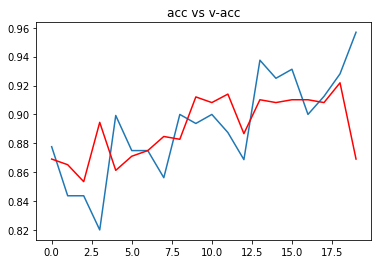

In [24]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

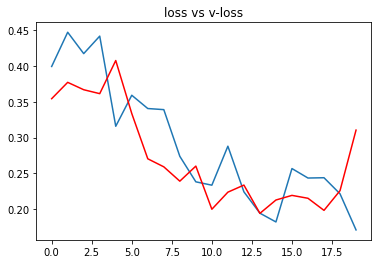

In [25]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()
     

In [63]:
from keras.utils import load_img, img_to_array
from tensorflow.keras.utils import img_to_array
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [90]:
# path for the image to see if it predics correct class

path = "/content/BrainTumorDataset/aa.jpg"


img = load_img(path, target_size=(224,224))
input_arr = img_to_array(img)/255

input_arr.shape

input_arr = np.expand_dims(input_arr, axis = 0)
# pred = model.predict(input_arr)

pred = model.predict(input_arr) 
y_classes = pred.argmax(axis=-1)

print(f"Probability of my class being healthy is {pred}")
print(f"class is {y_classes}")


if pred < 0.75:
  print("The MRI image is of Healthey brain")
else:
  print("The MRI image is of BRAIN TUMOR")

1/1 [==============================] - 0s 16ms/step
Probability of my class being healthy is [[0.48538387]]
class is [0]
The MRI image is of Healthey brain


In [103]:
train_data.class_indices

{'Healthy': 0, 'Tumor': 1}

In [53]:
#Delete folder

# !rm -rf BrainTumorDataset

In [35]:
from keras.utils import load_img, img_to_array
from tensorflow.keras.utils import img_to_array
import tensorflow as tf

In [69]:
def checking_correction_count(path):

  path = path

  img = load_img(path, target_size=(224,224))
  input_arr = img_to_array(img)/255

  input_arr.shape

  input_arr = np.expand_dims(input_arr, axis = 0)
  pred = model.predict(input_arr) 
  y_classes = pred.argmax(axis=-1)

  print(f"Probability of my class being healthy is {pred}")
  print(f"class is {y_classes}")
  return pred


  # img = load_img(path, target_size=(224,224))
  # input_arr = img_to_array(img)/255

  # input_arr.shape

  # input_arr = np.expand_dims(input_arr, axis = 0)
  # pred = model.predict(input_arr)




 

  

In [29]:
#Storing all the paths of healthy and tumorious images

def get_path(input_folder):
    retval = []
    for file in os.listdir(input_folder):
        if file.endswith(".jpg"):
            retval.append(os.path.join(input_folder, file))
    return retval

In [30]:
healthy_paths = []
path = "/content/Val/Healthy"
healthy_paths = get_path(path)

In [31]:
Tumor_paths = []
path = "/content/Val/Tumor"
Tumor_paths = get_path(path)

In [ ]:
healthy_count = 0
tumor_count   = 0
for path in healthy_paths:
  pred = checking_correction_count(path)


  # print(f"Path is {path}")
  # print(f"Probability of my class being healthy is {pred}")

  if pred <= 0.75:
    # print("The MRI image is of Healthey brain")
    healthy_count = healthy_count + 1
  else:
    # print("The MRI image is of BRAIN TUMOR")
    tumor_count = tumor_count + 1


print(f"Healthy count is: {healthy_count}, Tumor Count is: {tumor_count}")

In [ ]:
healthy_count = 0
tumor_count   = 0
for path in Tumor_paths:
  pred = checking_correction_count(path)


  # print(f"Path is {path}")
  # print(f"Probability of my class being healthy is {pred}")

  if pred < 0.75:
    # print("The MRI image is of Healthey brain")
    healthy_count = healthy_count + 1
  else:
    # print("The MRI image is of BRAIN TUMOR")
    tumor_count = tumor_count + 1


print(f"Healthy count is: {healthy_count}, Tumor Count is: {tumor_count}")